In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

sns.set(style="ticks")

# WHO Suicide Statistics

Основные исторические (1979-2016) данные по странам, годам и демографическим группам.

Основные совокупные числа. Количество самоубийств и численность населения измеряются в людях, поэтому 1 означает просто одного человека, а не тысячу. 

In [32]:
data = pd.read_csv('C:/Anaconda/who_suicide_statistics.csv', sep=",")

In [33]:
#Основные характеристики датасета

In [34]:
#Последние 5 строк датасета
data.tail()

,country,year,sex,age,suicides_no,population
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


In [35]:
#Количество строк и столбцов
data.shape

(43776, 6)

# Общая информация о датасете


In [36]:
data.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [37]:
#Колонки с типами данных
data.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [38]:
#Проверим наличие пустых значений
for col in data.columns:
    #Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

country - 0
year - 0
sex - 0
age - 0
suicides_no - 2256
population - 5460


In [39]:
#Заполнили пропуски медианными значениями
data = data.fillna(data.median(axis=0), axis=0)

In [40]:
#Проверка, что всё заполнили
data.count(axis=0)

country        43776
year           43776
sex            43776
age            43776
suicides_no    43776
population     43776
dtype: int64

In [41]:
#Определим уникальные значения для целевого признака
data['suicides_no'].unique()

array([1.4000e+01, 4.0000e+00, 6.0000e+00, ..., 1.1634e+04, 9.0680e+03,
       3.1710e+03])

# Визуальное исследование датасета

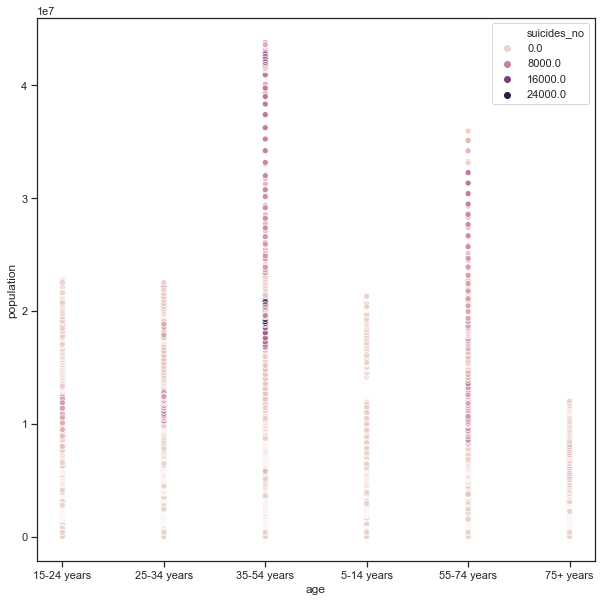

In [42]:
#Диаграмма рассеяния
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='age', y='population', data=data, hue='suicides_no')

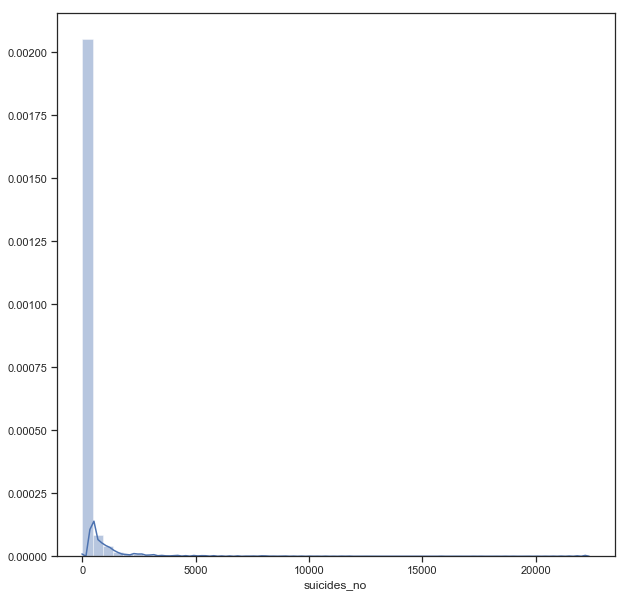

In [43]:
#Гистограмма
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['suicides_no'])

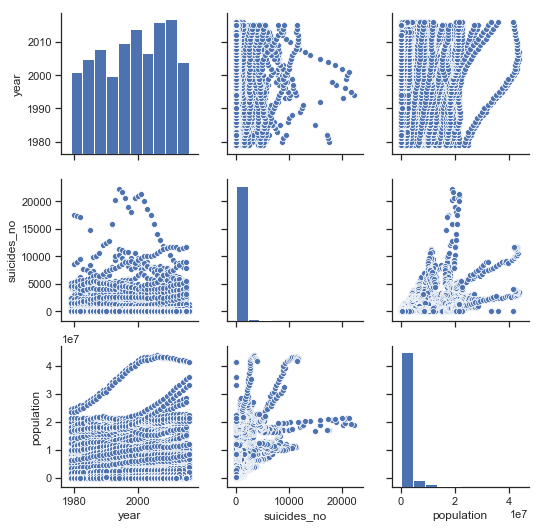

In [44]:
#Парные диаграммы
sns.pairplot(data)

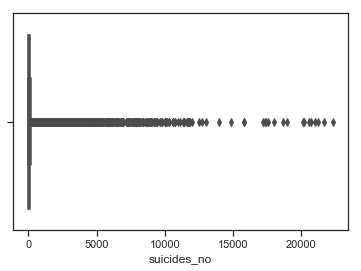

In [45]:
#одномерное распределение вероятности
sns.boxplot(x=data['suicides_no'])

In [46]:
#Выделение категориальных и числовых признаков
data_new = data
categorical_columns = [c for c in data_new.columns if data_new[c].dtype.name == 'object']
numerical_columns   = [c for c in data_new.columns if data_new[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['country', 'sex', 'age']
['year', 'suicides_no', 'population']


In [47]:
#Выделение бинарных и небинарных признаков
data_describe = data_new.describe(include=[object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex'] ['country', 'age']


In [48]:
#Обработка бинарных признаков
data_new.at[data_new['sex'] == 'female', 'sex'] = 0
data_new.at[data_new['sex'] == 'male', 'sex'] = 1
data_new['sex'].describe()

count    43776.000000
mean         0.500000
std          0.500006
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

In [49]:
#Обрарботка небинарных признаков
data_nonbinary = pd.get_dummies(data_new[nonbinary_columns])
print(data_nonbinary.columns)

Index(['country_Albania', 'country_Anguilla', 'country_Antigua and Barbuda',
       'country_Argentina', 'country_Armenia', 'country_Aruba',
       'country_Australia', 'country_Austria', 'country_Azerbaijan',
       'country_Bahamas',
       ...
       'country_Uzbekistan', 'country_Venezuela (Bolivarian Republic of)',
       'country_Virgin Islands (USA)', 'country_Zimbabwe', 'age_15-24 years',
       'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
       'age_55-74 years', 'age_75+ years'],
      dtype='object', length=147)


In [50]:
#Нормализация количественных признаков и создание одного нового датасета
data_numerical = data_new[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()

data_new = pd.concat((data_numerical, data_new[binary_columns], data_nonbinary), axis=1)
data_new = pd.DataFrame(data_new, dtype=float)
print(data_new.shape)
print(data_new.columns)

(43776, 151)
Index(['year', 'suicides_no', 'population', 'sex', 'country_Albania',
       'country_Anguilla', 'country_Antigua and Barbuda', 'country_Argentina',
       'country_Armenia', 'country_Aruba',
       ...
       'country_Uzbekistan', 'country_Venezuela (Bolivarian Republic of)',
       'country_Virgin Islands (USA)', 'country_Zimbabwe', 'age_15-24 years',
       'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
       'age_55-74 years', 'age_75+ years'],
      dtype='object', length=151)


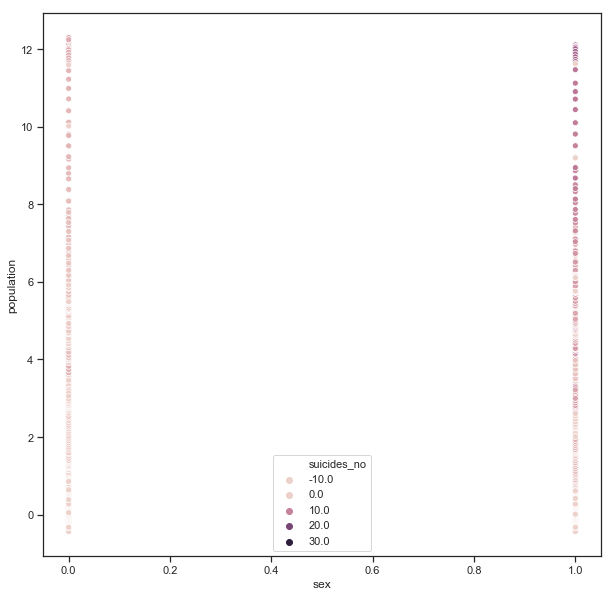

In [51]:
#Диаграмма рассеяния
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sex', y='population', data=data_new, hue='suicides_no')

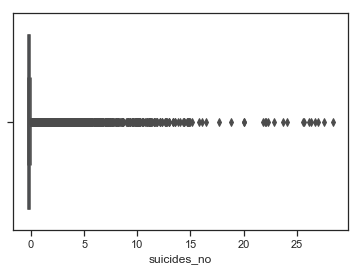

In [52]:
#одномерное распределение вероятности
sns.boxplot(x=data_new['suicides_no'])

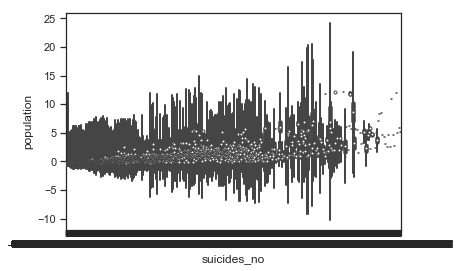

In [53]:
#Violin plot
# Распределение параметра population с группированные по suicides_no
sns.violinplot(x='suicides_no', y='population', data=data_new)

# Информация о корреляции признаков

In [54]:
data.corr()

,year,sex,suicides_no,population
year,1.000000,0.000000,-0.000962,0.021357
sex,0.000000,1.000000,0.123537,-0.009960
suicides_no,-0.000962,0.123537,1.000000,0.606450
population,0.021357,-0.009960,0.606450,1.000000


In [55]:
data_new.corr()

,year,suicides_no,population,sex,country_Albania,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,...,country_Uzbekistan,country_Venezuela (Bolivarian Republic of),country_Virgin Islands (USA),country_Zimbabwe,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
year,1.000000e+00,-0.000962,0.021357,4.326714e-18,1.340978e-02,8.786435e-03,3.320948e-03,-1.471061e-02,3.920528e-03,4.343083e-02,...,-1.323335e-02,-1.765199e-02,2.152702e-02,-1.361807e-02,1.779578e-18,2.943279e-18,6.706594e-18,5.114160e-18,7.422848e-18,5.607543e-18
suicides_no,-9.621454e-04,1.000000,0.606450,1.235369e-01,-2.071851e-02,-2.110611e-02,-2.073312e-02,3.543200e-03,-2.232859e-02,-1.745891e-02,...,-7.139632e-03,-1.292247e-02,-1.732854e-02,-2.553937e-03,-2.775164e-02,2.323305e-03,1.222989e-01,-1.000622e-01,4.873641e-02,-4.554477e-02
population,2.135677e-02,0.606450,1.000000,-9.959590e-03,-3.419856e-02,-2.924591e-02,-3.831325e-02,3.464143e-02,-3.577705e-02,-3.231841e-02,...,4.993914e-03,4.475670e-03,-3.230055e-02,-5.409942e-03,7.293344e-03,-6.552494e-04,1.217349e-01,5.145761e-03,4.318275e-04,-1.339505e-01
sex,4.326714e-18,0.123537,-0.009960,1.000000e+00,5.612253e-20,5.711704e-20,-5.902813e-20,1.518678e-19,5.122141e-20,-2.060780e-19,...,-5.528721e-20,-5.439635e-20,-2.060780e-19,-6.128033e-19,3.402596e-21,-3.402596e-21,3.402596e-21,3.402596e-21,5.103894e-21,0.000000e+00
country_Albania,1.340978e-02,-0.020719,-0.034199,5.612253e-20,1.000000e+00,-8.287266e-03,-8.142004e-03,-9.371168e-03,-9.111852e-03,-6.873658e-03,...,-8.430104e-03,-8.708982e-03,-6.873658e-03,-1.532988e-03,9.192228e-18,8.134894e-19,-1.484785e-18,-1.485074e-18,7.764205e-19,9.118379e-18
country_Anguilla,8.786435e-03,-0.021106,-0.029246,5.711704e-20,-8.287266e-03,1.000000e+00,-7.872804e-03,-9.061327e-03,-8.810585e-03,-6.646394e-03,...,-8.151378e-03,-8.421035e-03,-6.646394e-03,-1.482302e-03,1.433829e-19,1.433829e-19,-2.001075e-18,-2.001374e-18,1.056663e-19,2.203128e-19
country_Antigua and Barbuda,3.320948e-03,-0.020733,-0.038313,-5.902813e-20,-8.142004e-03,-7.872804e-03,1.000000e+00,-8.902497e-03,-8.656150e-03,-6.529893e-03,...,-8.008498e-03,-8.273428e-03,-6.529893e-03,-1.456320e-03,8.733332e-18,8.733332e-18,6.549999e-18,6.549999e-18,8.694344e-18,8.655355e-18
country_Argentina,-1.471061e-02,0.003543,0.034641,1.518678e-19,-9.371168e-03,-9.061327e-03,-8.902497e-03,1.000000e+00,-9.962932e-03,-7.515683e-03,...,-9.217507e-03,-9.522432e-03,-7.515683e-03,-1.676175e-03,-7.715250e-18,-7.715250e-18,-7.646271e-18,-7.646537e-18,-7.663781e-18,-7.681026e-18
country_Armenia,3.920528e-03,-0.022329,-0.035777,5.122141e-20,-9.111852e-03,-8.810585e-03,-8.656150e-03,-9.962932e-03,1.000000e+00,-7.307712e-03,...,-8.962443e-03,-9.258930e-03,-7.307712e-03,-1.629792e-03,9.773889e-18,9.773889e-18,7.329394e-18,7.329666e-18,9.738437e-18,9.703804e-18
country_Aruba,4.343083e-02,-0.017459,-0.032318,-2.060780e-19,-6.873658e-03,-6.646394e-03,-6.529893e-03,-7.515683e-03,-7.307712e-03,1.000000e+00,...,-6.760950e-03,-6.984610e-03,-5.512679e-03,-1.229457e-03,0.000000e+00,0.000000e+00,1.843218e-18,1.843218e-18,4.608044e-20,0.000000e+00


In [56]:
data.corr(method='kendall')

,year,sex,suicides_no,population
year,1.000000,0.000000,-0.022183,-0.003620
sex,0.000000,1.000000,0.142904,-0.015135
suicides_no,-0.022183,0.142904,1.000000,0.493486
population,-0.003620,-0.015135,0.493486,1.000000


In [57]:
data.corr(method='spearman')

,year,sex,suicides_no,population
year,1.000000,0.000000,-0.033021,-0.005582
sex,0.000000,1.000000,0.170777,-0.018409
suicides_no,-0.033021,0.170777,1.000000,0.662356
population,-0.005582,-0.018409,0.662356,1.000000


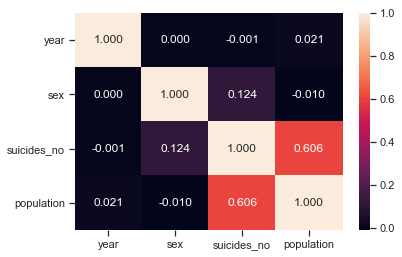

In [58]:
#Вывод значений в ячейках в тепловой карте
sns.heatmap(data.corr(), annot=True, fmt='.3f')

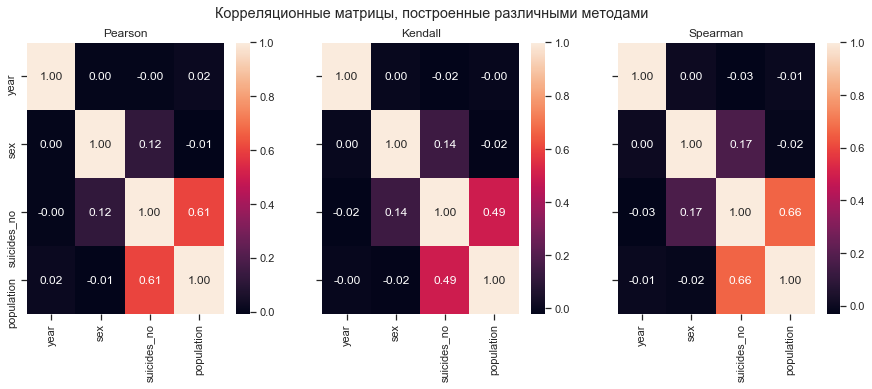

In [60]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')